In [1]:
from __future__ import division #, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 10 # Ensure reproducible results
%matplotlib inline
plt.style.use('ggplot')

In [2]:
bad_column_name = "unnamed"

# Flying to New York City - Raw Data Preprocess

In [8]:
path_data = os.path.realpath(os.path.join(os.getcwd(), 'raw_data.csv'))
assert os.path.isfile(path_data)
path_data

'C:\\Users\\lmano\\Documents\\UoE\\2. DME\\DME project\\raw_data.csv'

In [9]:
data_frame = pd.read_csv(path_data, delimiter = ',', index_col=None, header=0)
#all_pandas.append(data_full)
#data_frame = pd.concat(all_pandas)
data_frame.shape

(492181, 40)

In [10]:
print("There are {} entries and {} columns in the DataFrame"\
      .format(data_frame.shape[0], data_frame.shape[1]))

There are 492181 entries and 40 columns in the DataFrame


In [6]:
for col in data_frame.columns:
    print col

Unnamed: 0
YEAR
QUARTER
MONTH
DAY_OF_MONTH
DAY_OF_WEEK
FL_DATE
UNIQUE_CARRIER
AIRLINE_ID
CARRIER
FL_NUM
ORIGIN_AIRPORT_ID
ORIGIN
ORIGIN_CITY_NAME
ORIGIN_STATE_ABR
ORIGIN_STATE_NM
DEST_AIRPORT_ID
DEST
DEST_CITY_NAME
DEST_STATE_ABR
DEST_STATE_NM
CRS_DEP_TIME
DEP_TIME
DEP_DELAY
DEP_DELAY_NEW
DEP_DEL15
DEP_DELAY_GROUP
DEP_TIME_BLK
CRS_ARR_TIME
ARR_TIME
ARR_DELAY
ARR_DELAY_NEW
ARR_DEL15
ARR_DELAY_GROUP
CANCELLED
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
FLIGHTS
DISTANCE
DISTANCE_GROUP


In [11]:
st = "aAA"
st.lower()

'aaa'

In [12]:
for col in data_frame.columns:
    if bad_column_name in col.lower():
        data_frame.drop(col, axis=1, inplace=True)
        
data_frame.shape

(492181, 39)

In [9]:
data_frame.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
UNIQUE_CARRIER          object
AIRLINE_ID               int64
CARRIER                 object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
ORIGIN_STATE_NM         object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK            object
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELA

### Cancelled Flights

There are 8949 cancelled flights out of 483232: 1.85190550295 %


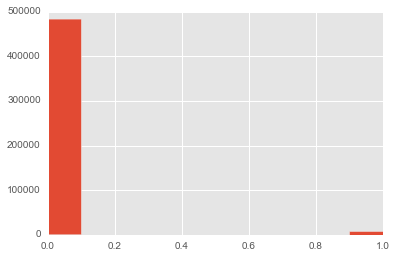

In [13]:
plt.hist(data_frame['CANCELLED'].values)
count=0
count_c=0
for v in data_frame['CANCELLED'].values:
    if v==1.0:
        count_c +=1
    else:
        count +=1
print ("There are {} cancelled flights out of {}: {} %".format(count_c,count, (100*count_c)/count))

We will remove all of the cancelled flights because these were never reached their destination and therefore it does not make sense to include them when predicting flight delays

In [14]:
df = data_frame[data_frame['CANCELLED'] == 0]

In [15]:
assert len(df) == len(data_frame) - count_c

In [16]:
df.shape

(483232, 39)

### Number and percentage of nulls per feature and per row

In [17]:
df.isnull().sum()

YEAR                      0
QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
UNIQUE_CARRIER            0
AIRLINE_ID                0
CARRIER                   0
FL_NUM                    0
ORIGIN_AIRPORT_ID         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_STATE_ABR          0
ORIGIN_STATE_NM           0
DEST_AIRPORT_ID           0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_ABR            0
DEST_STATE_NM             0
CRS_DEP_TIME              0
DEP_TIME                  0
DEP_DELAY                 0
DEP_DELAY_NEW             0
DEP_DEL15                 0
DEP_DELAY_GROUP           0
DEP_TIME_BLK              0
CRS_ARR_TIME              0
ARR_TIME                242
ARR_DELAY              1570
ARR_DELAY_NEW          1570
ARR_DEL15              1570
ARR_DELAY_GROUP        1570
CANCELLED                 0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME 

In [18]:
feature_number = df.count()
(100 * df.isnull().sum()) / df.count()

YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
FL_DATE                0.000000
UNIQUE_CARRIER         0.000000
AIRLINE_ID             0.000000
CARRIER                0.000000
FL_NUM                 0.000000
ORIGIN_AIRPORT_ID      0.000000
ORIGIN                 0.000000
ORIGIN_CITY_NAME       0.000000
ORIGIN_STATE_ABR       0.000000
ORIGIN_STATE_NM        0.000000
DEST_AIRPORT_ID        0.000000
DEST                   0.000000
DEST_CITY_NAME         0.000000
DEST_STATE_ABR         0.000000
DEST_STATE_NM          0.000000
CRS_DEP_TIME           0.000000
DEP_TIME               0.000000
DEP_DELAY              0.000000
DEP_DELAY_NEW          0.000000
DEP_DEL15              0.000000
DEP_DELAY_GROUP        0.000000
DEP_TIME_BLK           0.000000
CRS_ARR_TIME           0.000000
ARR_TIME               0.050105
ARR_DELAY              0.325955
ARR_DELAY_NEW          0.325955
ARR_DEL1

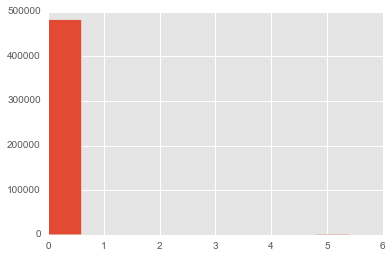

In [19]:
plt.hist(df.isnull().sum(axis=1))
x = df.isnull().sum(axis=1)

In [20]:
null_inds = set()
for col in df.columns:
    inds = np.argwhere(df[col].isnull()).flatten()
    if len(inds) > 0:
        null_inds |= set(inds)

In [21]:
len(null_inds)

1570

In [22]:
print "this is a very small portion of our original data: {}".format(len(null_inds) / len(df))

this is a very small portion of our original data: 0.00324895702271


Makes sense to delete them completely

In [23]:
df[col].isnull() == False

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
492151    True
492152    True
492153    True
492154    True
492155    True
492156    True
492157    True
492158    True
492159    True
492160    True
492161    True
492162    True
492163    True
492164    True
492165    True
492166    True
492167    True
492168    True
492169    True
492170    True
492171    True
492172    True
492173    True
492174    True
492175    True
492176    True
492177    True
492178    True
492179    True
492180    True
Name: DISTANCE_GROUP, dtype: bool

In [24]:
df_clear = df.copy()
for col in df_clear.columns:
    #inds = np.argwhere().flatten()
    df_clear = df_clear[df_clear[col].isnull() == False]
    #if len(inds) > 0:
    #    df = df[inds]

In [39]:
df_clear.shape

(481662, 39)

In [40]:
assert len(df_clear) == len(df) - len(null_inds)

In [41]:
assert np.all(df_clear.isnull() == False)

In [42]:
clear_data_path = os.path.realpath(os.path.join(os.getcwd(), 'clear_data.csv'))
df_clear.to_csv(clear_data_path, index=False)

### Unique values per feature

In [43]:
for column in df_clear:
    print('\n'+ column + ': ')
    if (len(df_clear[column].unique()) < 150):
        print(df_clear[column].unique())
    else:
        print('Too large to show')


YEAR: 
[2016]

QUARTER: 
[1 2 3 4]

MONTH: 
[ 1  2  3  4  5  6  7  8  9 10 11 12]

DAY_OF_MONTH: 
[ 4  5  6  7 16 17 18  2 12 13 14 15 25 26 27 21 22  1  3  8  9 10 11 20 19
 30 31 28 29 23 24]

DAY_OF_WEEK: 
[1 2 3 4 6 7 5]

FL_DATE: 
Too large to show

UNIQUE_CARRIER: 
['F9' 'HA' 'DL' 'NK' 'EV' 'OO' 'UA' 'VX' 'AA' 'AS' 'B6' 'WN']

AIRLINE_ID: 
[20436 19690 19790 20416 20366 20304 19977 21171 19805 19930 20409 19393]

CARRIER: 
['F9' 'HA' 'DL' 'NK' 'EV' 'OO' 'UA' 'VX' 'AA' 'AS' 'B6' 'WN']

FL_NUM: 
Too large to show

ORIGIN_AIRPORT_ID: 
[13303 12953 10397 12173 11433 10423 15304 15024 14107 11697 10994 10792
 11292 13204 14747 14683 11298 12892 14869 12889 14027 14576 12478 14679
 13495 10257 10721 14524 14843 14771 13930 13577 12265 12197 14025 15096
 11618 12397 10577 12266 13502 11259 14262 11278 11057 14122 11503 14100
 15070 12451 12954 12191 14831 14254 10732 14685 14492 14057 12264 14635
 10785 14321 10140 14570 14893 14986 13796 10800 11252 13487 10693 10821
 12339 12391 1501

In [47]:
df_clear = df_clear.drop(['YEAR','CARRIER','AIRLINE_ID','FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEP_DELAY_NEW','ARR_DELAY_NEW','CANCELLED','FLIGHTS'],axis=1)

ValueError: labels ['YEAR' 'CARRIER' 'AIRLINE_ID' 'FL_NUM' 'ORIGIN_AIRPORT_ID'
 'DEST_AIRPORT_ID' 'DEP_DELAY_NEW' 'ARR_DELAY_NEW' 'CANCELLED' 'FLIGHTS'] not contained in axis

In [50]:
print("There are {} entries and {} columns in the DataFrame"\
      .format(df_clear.shape[0], df_clear.shape[1]))

There are 481662 entries and 29 columns in the DataFrame


In [53]:
df_clear.isnull().sum()

QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
UNIQUE_CARRIER         0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_STATE_ABR       0
ORIGIN_STATE_NM        0
DEST                   0
DEST_CITY_NAME         0
DEST_STATE_ABR         0
DEST_STATE_NM          0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DEL15              0
DEP_DELAY_GROUP        0
DEP_TIME_BLK           0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DEL15              0
ARR_DELAY_GROUP        0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
DISTANCE_GROUP         0
dtype: int64

In [51]:
clear_data_path = os.path.realpath(os.path.join(os.getcwd(), 'clear_data_new.csv'))
df_clear.to_csv(clear_data_path, index=False)